In [1]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
start_date='2017-01-04'
end_date='2021-09-02'
stocks=['BA','Ko','JPM','GOOGL']
df=yf.download(stocks,start=start_date,end=end_date)['Close']
df

[*********************100%***********************]  4 of 4 completed


,BA,GOOGL,JPM,KO
Date,,,,
2017-01-03,156.970001,40.400501,87.230003,41.799999
2017-01-04,158.619995,40.388500,86.910004,41.650002
2017-01-05,158.710007,40.651001,86.110001,41.750000
2017-01-06,159.100006,41.260502,86.120003,41.740002
2017-01-09,158.320007,41.359001,86.180000,41.320000
...,...,...,...,...
2021-08-26,216.500000,141.440506,161.750000,55.540001
2021-08-27,221.750000,144.003998,163.050003,55.650002
2021-08-30,217.660004,144.590500,160.440002,56.180000


In [3]:
returns=df.pct_change()
returns

,BA,GOOGL,JPM,KO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.010512,-0.000297,-0.003668,-0.003588
2017-01-05,0.000567,0.006499,-0.009205,0.002401
2017-01-06,0.002457,0.014994,0.000116,-0.000239
2017-01-09,-0.004903,0.002387,0.000697,-0.010062
...,...,...,...,...
2021-08-26,-0.020495,-0.004494,0.005158,-0.009452
2021-08-27,0.024249,0.018124,0.008037,0.001981
2021-08-30,-0.018444,0.004073,-0.016007,0.009524


In [4]:
(0.010512+0.000967-0.003668-0.003588)/4

0.00105575

In [5]:
Average_return=returns.mean(axis=1)
Average_return.fillna(0,inplace=True)
Average_return

Date
2017-01-03    0.000000
2017-01-04    0.000739
2017-01-05    0.000066
2017-01-06    0.004332
2017-01-09   -0.002970
                ...   
2021-08-26   -0.007321
2021-08-27    0.013098
2021-08-30   -0.005214
2021-08-31    0.002113
2021-09-01    0.000651
Length: 1175, dtype: float64

In [6]:
port_cumsum=Average_return.cumsum()
port_cumsum

Date
2017-01-03    0.000000
2017-01-04    0.000739
2017-01-05    0.000805
2017-01-06    0.005137
2017-01-09    0.002167
                ...   
2021-08-26    0.875004
2021-08-27    0.888102
2021-08-30    0.882888
2021-08-31    0.885002
2021-09-01    0.885653
Length: 1175, dtype: float64

In [7]:
0.001055+0.000703+0.004403

0.006161

In [8]:
100.105535+(100.105535*0.000703)

100.175909191105

In [9]:
port_ammount=100
port_return=port_ammount*(1+port_cumsum)
port_return

Date
2017-01-03    100.000000
2017-01-04    100.073939
2017-01-05    100.080509
2017-01-06    100.513697
2017-01-09    100.216672
                 ...    
2021-08-26    187.500428
2021-08-27    188.810210
2021-08-30    188.288837
2021-08-31    188.500172
2021-09-01    188.565253
Length: 1175, dtype: float64

In [10]:
Fixed_weights=[(1/4)*100 for i in range(0,4)]
Fixed_weights

[25.0, 25.0, 25.0, 25.0]

In [11]:
46.562615+62.122542+45.579277+35.073958

189.338392

In [12]:
positions=25.0*(1+returns.cumsum())
positions['Drifting Weighted Portfolio']=port_return

In [13]:
100.105535/25.262788

3.962568779027873

In [14]:
positions['Drifting BA Weight']=positions['BA']/positions['Drifting Weighted Portfolio']
positions['Drifting GOOG Weight']=positions['GOOGL']/positions['Drifting Weighted Portfolio']
positions['Drifting JPM Weight']=positions['JPM']/positions['Drifting Weighted Portfolio']
positions['Drifting KO Weight']=positions['KO']/positions['Drifting Weighted Portfolio']
positions

,BA,GOOGL,JPM,KO,Drifting Weighted Portfolio,Drifting BA Weight,Drifting GOOG Weight,Drifting JPM Weight,Drifting KO Weight
Date,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN
2017-01-04,25.262788,24.992574,24.908289,24.910288,100.073939,0.252441,0.249741,0.248899,0.248919
2017-01-05,25.276975,25.155059,24.678165,24.970312,100.080509,0.252566,0.251348,0.246583,0.249502
2017-01-06,25.338407,25.529896,24.681068,24.964325,100.513697,0.252089,0.253994,0.245549,0.248367
2017-01-09,25.215843,25.589577,24.698485,24.712766,100.216672,0.251613,0.255343,0.246451,0.246593
...,...,...,...,...,...,...,...,...,...
2021-08-26,46.363322,60.686481,45.890835,34.559792,187.500428,0.247270,0.323660,0.244751,0.184318
2021-08-27,46.969557,61.139585,46.091763,34.609306,188.810210,0.248766,0.323815,0.244117,0.183302
2021-08-30,46.508453,61.241405,45.691578,34.847400,188.288837,0.247006,0.325252,0.242667,0.185074


In [15]:
for i in positions.columns:
    if i=='Total':
        positions[i].fillna(100,inplace=True)
        break
    positions[i].fillna(25,inplace=True)
positions.fillna(0.25,inplace=True)        

In [16]:
positions

,BA,GOOGL,JPM,KO,Drifting Weighted Portfolio,Drifting BA Weight,Drifting GOOG Weight,Drifting JPM Weight,Drifting KO Weight
Date,,,,,,,,,
2017-01-03,25.000000,25.000000,25.000000,25.000000,100.000000,25.000000,25.000000,25.000000,25.000000
2017-01-04,25.262788,24.992574,24.908289,24.910288,100.073939,0.252441,0.249741,0.248899,0.248919
2017-01-05,25.276975,25.155059,24.678165,24.970312,100.080509,0.252566,0.251348,0.246583,0.249502
2017-01-06,25.338407,25.529896,24.681068,24.964325,100.513697,0.252089,0.253994,0.245549,0.248367
2017-01-09,25.215843,25.589577,24.698485,24.712766,100.216672,0.251613,0.255343,0.246451,0.246593
...,...,...,...,...,...,...,...,...,...
2021-08-26,46.363322,60.686481,45.890835,34.559792,187.500428,0.247270,0.323660,0.244751,0.184318
2021-08-27,46.969557,61.139585,46.091763,34.609306,188.810210,0.248766,0.323815,0.244117,0.183302
2021-08-30,46.508453,61.241405,45.691578,34.847400,188.288837,0.247006,0.325252,0.242667,0.185074


In [18]:
Fixed=[]
x=100
for i in range(0,len(df)):
    x=x*(1+Average_return.iloc[i])
    Fixed.append(x)

In [19]:
positions['Fixed Weighted Portfolio']=Fixed
positions

,BA,GOOGL,JPM,KO,Drifting Weighted Portfolio,Drifting BA Weight,Drifting GOOG Weight,Drifting JPM Weight,Drifting KO Weight,Fixed Weighted Portfolio
Date,,,,,,,,,,
2017-01-03,25.000000,25.000000,25.000000,25.000000,100.000000,25.000000,25.000000,25.000000,25.000000,100.000000
2017-01-04,25.262788,24.992574,24.908289,24.910288,100.073939,0.252441,0.249741,0.248899,0.248919,100.073939
2017-01-05,25.276975,25.155059,24.678165,24.970312,100.080509,0.252566,0.251348,0.246583,0.249502,100.080514
2017-01-06,25.338407,25.529896,24.681068,24.964325,100.513697,0.252089,0.253994,0.245549,0.248367,100.514050
2017-01-09,25.215843,25.589577,24.698485,24.712766,100.216672,0.251613,0.255343,0.246451,0.246593,100.215499
...,...,...,...,...,...,...,...,...,...,...
2021-08-26,46.363322,60.686481,45.890835,34.559792,187.500428,0.247270,0.323660,0.244751,0.184318,206.503002
2021-08-27,46.969557,61.139585,46.091763,34.609306,188.810210,0.248766,0.323815,0.244117,0.183302,209.207741
2021-08-30,46.508453,61.241405,45.691578,34.847400,188.288837,0.247006,0.325252,0.242667,0.185074,208.116988


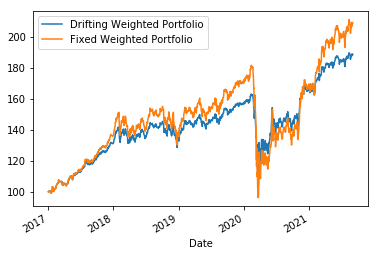

In [20]:
positions[['Drifting Weighted Portfolio','Fixed Weighted Portfolio']].plot()

In [21]:
208.556811*(1+ 0.000651)

208.692581483961

In [22]:
returns

,BA,GOOGL,JPM,KO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.010512,-0.000297,-0.003668,-0.003588
2017-01-05,0.000567,0.006499,-0.009205,0.002401
2017-01-06,0.002457,0.014994,0.000116,-0.000239
2017-01-09,-0.004903,0.002387,0.000697,-0.010062
...,...,...,...,...
2021-08-26,-0.020495,-0.004494,0.005158,-0.009452
2021-08-27,0.024249,0.018124,0.008037,0.001981
2021-08-30,-0.018444,0.004073,-0.016007,0.009524


In [23]:
46.508453*(1+0.008454)

46.901635461662

In [24]:
returns.cumsum().mean(axis=1)

Date
2017-01-03         NaN
2017-01-04    0.000739
2017-01-05    0.000805
2017-01-06    0.005137
2017-01-09    0.002167
                ...   
2021-08-26    0.875004
2021-08-27    0.888102
2021-08-30    0.882888
2021-08-31    0.885002
2021-09-01    0.885653
Length: 1175, dtype: float64

In [25]:
25*(1+0.010512)

25.262800000000002

In [26]:
((25*(1+0.010512))*(1+0.000567))

25.2771240076

In [27]:
((25*(1+0.010512))*(1+0.000567))*(1+0.002457)

25.33922990128667